# Project Topic: Understanding the demographics of unemployment in Nigeria

# Importing the necessary libraries for the project

In [598]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Load CSV file into memory

In [599]:
unemployment_rate_df = pd.read_csv('unemployment_rate.csv')
unemployment_rate_df

,Country,Country Name,Country - RegionId,Country - Latitude,Country - Longitude,Indicator,Indicator Name,Indicator - Unit,Group,Group Name,...,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
0,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G71,NCE/OND/NURSING,...,NaN,NaN,NaN,NaN,NaN,NaN,24.385153,31.796625,34.080299,33.769715
1,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G72,BA/BSc/Bed/HND,...,NaN,NaN,NaN,NaN,NaN,NaN,28.080790,29.538151,31.449631,25.227678
2,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G73,MSC/MA/MAdm,...,NaN,NaN,NaN,NaN,NaN,NaN,16.451734,17.426408,19.709205,19.803076
3,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G15,Male,...,11.490406,11.952924,12.288732,12.729616,13.971800,16.492489,19.267128,20.835711,20.012794,20.332526
4,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G16,Female,...,15.320665,15.906336,16.254697,16.244590,18.204285,21.161288,21.594995,22.964759,26.062927,26.556245
5,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G7,Post Secondary,...,23.196970,23.284944,23.673778,16.658574,27.960099,31.778799,25.650149,30.299601,32.449147,29.753088
6,NG,Nigeria,NG,NaN,NaN,KN.N9,New Nigeria,%,KN.G101,Youth (15-34),...,NaN,19.081458,19.393909,19.221868,22.280329,25.483874,26.583409,29.048624,30.504368,29.721639
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Source:,"National Bureau of Statistics, Nigeria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Download URL:,http://nigeria.opendataforafrica.org/NGLBFRSTA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selecting the columns needed for the analysis

In [600]:
unemployment_rate_df = unemployment_rate_df[['Group Name','2010','2011','2012','2013','2014Q1','2014Q2','2014Q3','2014Q4','2015Q1','2015Q2','2015Q3','2015Q4','2016Q1','2016Q2','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4','2018Q1','2018Q2','2018Q3']]
unemployment_rate_df.head()

,Group Name,2010,2011,2012,2013,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,...,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
0,NCE/OND/NURSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.385153,31.796625,34.080299,33.769715
1,BA/BSc/Bed/HND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.080790,29.538151,31.449631,25.227678
2,MSC/MA/MAdm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.451734,17.426408,19.709205,19.803076
3,Male,4.680082,5.866308,9.888933,8.353896,6.572327,6.237119,8.129195,5.368540,6.316995,...,11.490406,11.952924,12.288732,12.729616,13.971800,16.492489,19.267128,20.835711,20.012794,20.332526
4,Female,5.629287,6.074571,11.230509,11.687747,9.201012,8.731677,11.374479,7.530291,8.853857,...,15.320665,15.906336,16.254697,16.244590,18.204285,21.161288,21.594995,22.964759,26.062927,26.556245


In [601]:
unemployment_rate_df = pd.melt(unemployment_rate_df, id_vars = ['Group Name'])
unemployment_rate_df

,Group Name,variable,value
0,NCE/OND/NURSING,2010,NaN
1,BA/BSc/Bed/HND,2010,NaN
2,MSC/MA/MAdm,2010,NaN
3,Male,2010,4.680082
4,Female,2010,5.629287
5,Post Secondary,2010,5.258835
6,Youth (15-34),2010,NaN
7,NaN,2010,NaN
8,NaN,2010,NaN
9,NaN,2010,NaN


In [602]:
unemployment_rate_df = unemployment_rate_df.rename(columns={'variable':'Date'})
unemployment_rate_df

,Group Name,Date,value
0,NCE/OND/NURSING,2010,NaN
1,BA/BSc/Bed/HND,2010,NaN
2,MSC/MA/MAdm,2010,NaN
3,Male,2010,4.680082
4,Female,2010,5.629287
5,Post Secondary,2010,5.258835
6,Youth (15-34),2010,NaN
7,NaN,2010,NaN
8,NaN,2010,NaN
9,NaN,2010,NaN


In [603]:
unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df.Date).dt.to_period('Q')#converting the date to datetime datatype

# Pivot table

In [604]:
unemployment_rate_df_pivot= unemployment_rate_df.pivot_table(index ='Date',columns = 'Group Name', values = 'value')
unemployment_rate_df_pivot

Group Name,BA/BSc/Bed/HND,Female,MSC/MA/MAdm,Male,NCE/OND/NURSING,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,NaN,5.629287,NaN,4.680082,NaN,5.258835,NaN
2011Q1,NaN,6.074571,NaN,5.866308,NaN,4.420791,NaN
2012Q1,NaN,11.230509,NaN,9.888933,NaN,13.207793,NaN
2013Q1,NaN,11.687747,NaN,8.353896,NaN,12.399870,NaN
2014Q1,NaN,9.201012,NaN,6.572327,NaN,9.467895,NaN
2014Q2,NaN,8.731677,NaN,6.237119,NaN,8.987781,NaN
2014Q3,NaN,11.374479,NaN,8.129195,NaN,12.015410,NaN
2014Q4,NaN,7.530291,NaN,5.368540,NaN,7.023211,NaN
2015Q1,NaN,8.853857,NaN,6.316995,NaN,8.600678,NaN


# Renaming columns

In [605]:
unemployment_rate_df_pivot = unemployment_rate_df_pivot.rename(columns={'BA/BSc/Bed/HND':'First degree','MSC/MA/MAdm': 'Second degree','NCE/OND/NURSING':'Diploma'})
unemployment_rate_df_pivot.head()

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,NaN,5.629287,NaN,4.680082,NaN,5.258835,NaN
2011Q1,NaN,6.074571,NaN,5.866308,NaN,4.420791,NaN
2012Q1,NaN,11.230509,NaN,9.888933,NaN,13.207793,NaN
2013Q1,NaN,11.687747,NaN,8.353896,NaN,12.399870,NaN
2014Q1,NaN,9.201012,NaN,6.572327,NaN,9.467895,NaN


# Getting rid of missing values by assign zero to it

In [606]:
unemployment_rate_df_pivot.isnull() #checking for missing values

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,True,False,True,False,True,False,True
2011Q1,True,False,True,False,True,False,True
2012Q1,True,False,True,False,True,False,True
2013Q1,True,False,True,False,True,False,True
2014Q1,True,False,True,False,True,False,True
2014Q2,True,False,True,False,True,False,True
2014Q3,True,False,True,False,True,False,True
2014Q4,True,False,True,False,True,False,True
2015Q1,True,False,True,False,True,False,True


In [607]:
unemployment_rate_df1 = unemployment_rate_df_pivot.fillna(0)
unemployment_rate_df1

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,0.000000,5.629287,0.000000,4.680082,0.000000,5.258835,0.000000
2011Q1,0.000000,6.074571,0.000000,5.866308,0.000000,4.420791,0.000000
2012Q1,0.000000,11.230509,0.000000,9.888933,0.000000,13.207793,0.000000
2013Q1,0.000000,11.687747,0.000000,8.353896,0.000000,12.399870,0.000000
2014Q1,0.000000,9.201012,0.000000,6.572327,0.000000,9.467895,0.000000
2014Q2,0.000000,8.731677,0.000000,6.237119,0.000000,8.987781,0.000000
2014Q3,0.000000,11.374479,0.000000,8.129195,0.000000,12.015410,0.000000
2014Q4,0.000000,7.530291,0.000000,5.368540,0.000000,7.023211,0.000000
2015Q1,0.000000,8.853857,0.000000,6.316995,0.000000,8.600678,0.000000


# Grouping data

In [608]:
unemployment_rate_df1_grouped = unemployment_rate_df1.groupby('Date')
unemployment_rate_df1_grouped.count()

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,1,1,1,1,1,1,1
2011Q1,1,1,1,1,1,1,1
2012Q1,1,1,1,1,1,1,1
2013Q1,1,1,1,1,1,1,1
2014Q1,1,1,1,1,1,1,1
2014Q2,1,1,1,1,1,1,1
2014Q3,1,1,1,1,1,1,1
2014Q4,1,1,1,1,1,1,1
2015Q1,1,1,1,1,1,1,1


In [609]:
unemployment_rate_df1_grouped.groups

{Period('2010Q1', 'Q-DEC'): PeriodIndex(['2010Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2011Q1', 'Q-DEC'): PeriodIndex(['2011Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2012Q1', 'Q-DEC'): PeriodIndex(['2012Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2013Q1', 'Q-DEC'): PeriodIndex(['2013Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2014Q1', 'Q-DEC'): PeriodIndex(['2014Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2014Q2', 'Q-DEC'): PeriodIndex(['2014Q2'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2014Q3', 'Q-DEC'): PeriodIndex(['2014Q3'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2014Q4', 'Q-DEC'): PeriodIndex(['2014Q4'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2015Q1', 'Q-DEC'): PeriodIndex(['2015Q1'], dtype='period[Q-DEC]', name='Date', freq='Q-DEC'),
 Period('2015Q2', 'Q-DEC'): PeriodIndex(['2015Q2'], dtype='period[Q-DEC]'

In [610]:
unemployment_rate_df1.describe()

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4.969402,14.265137,3.190888,11.086418,5.392687,17.132918,9.622586
std,11.116254,6.119398,7.137523,5.163712,12.133082,9.223619,12.595587
min,0.000000,5.629287,0.000000,4.680082,0.000000,4.420791,0.000000
25%,0.000000,9.413086,0.000000,6.720862,0.000000,9.594552,0.000000
50%,0.000000,12.268137,0.000000,9.888933,0.000000,13.207793,0.000000
75%,0.000000,17.229491,0.000000,13.350708,0.000000,24.661963,20.837119
max,31.449631,26.556245,19.803076,20.835711,34.080299,32.449147,30.504368


In [611]:
unemployment_rate_df1 = unemployment_rate_df1_grouped.agg(np.mean) # aggregrating
unemployment_rate_df1

Group Name,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Date,,,,,,,
2010Q1,0.000000,5.629287,0.000000,4.680082,0.000000,5.258835,0.000000
2011Q1,0.000000,6.074571,0.000000,5.866308,0.000000,4.420791,0.000000
2012Q1,0.000000,11.230509,0.000000,9.888933,0.000000,13.207793,0.000000
2013Q1,0.000000,11.687747,0.000000,8.353896,0.000000,12.399870,0.000000
2014Q1,0.000000,9.201012,0.000000,6.572327,0.000000,9.467895,0.000000
2014Q2,0.000000,8.731677,0.000000,6.237119,0.000000,8.987781,0.000000
2014Q3,0.000000,11.374479,0.000000,8.129195,0.000000,12.015410,0.000000
2014Q4,0.000000,7.530291,0.000000,5.368540,0.000000,7.023211,0.000000
2015Q1,0.000000,8.853857,0.000000,6.316995,0.000000,8.600678,0.000000


# Data Visualization for Unemployment Rate

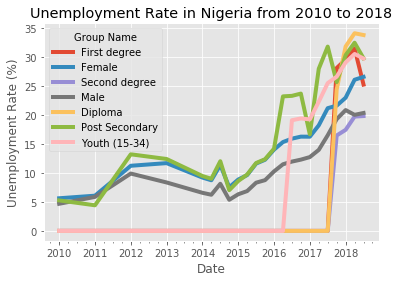

In [612]:
style.use("ggplot")
unemployment_rate_df1.plot(linewidth = 4) #data visualization using line plot
plt.grid(True)
plt.title('Unemployment Rate in Nigeria from 2010 to 2018')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [613]:
gender_df = unemployment_rate_df1[['Male','Female']]
gender_df

Group Name,Male,Female
Date,,
2010Q1,4.680082,5.629287
2011Q1,5.866308,6.074571
2012Q1,9.888933,11.230509
2013Q1,8.353896,11.687747
2014Q1,6.572327,9.201012
2014Q2,6.237119,8.731677
2014Q3,8.129195,11.374479
2014Q4,5.368540,7.530291
2015Q1,6.316995,8.853857


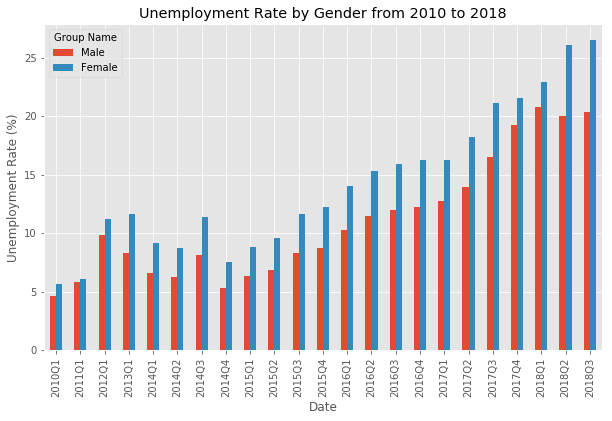

In [647]:
gender_df.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Gender from 2010 to 2018') 
plt.show()

In [615]:
education_df = unemployment_rate_df1[['First degree','Second degree','Diploma','Post Secondary']]
education_df

Group Name,First degree,Second degree,Diploma,Post Secondary
Date,,,,
2010Q1,0.000000,0.000000,0.000000,5.258835
2011Q1,0.000000,0.000000,0.000000,4.420791
2012Q1,0.000000,0.000000,0.000000,13.207793
2013Q1,0.000000,0.000000,0.000000,12.399870
2014Q1,0.000000,0.000000,0.000000,9.467895
2014Q2,0.000000,0.000000,0.000000,8.987781
2014Q3,0.000000,0.000000,0.000000,12.015410
2014Q4,0.000000,0.000000,0.000000,7.023211
2015Q1,0.000000,0.000000,0.000000,8.600678


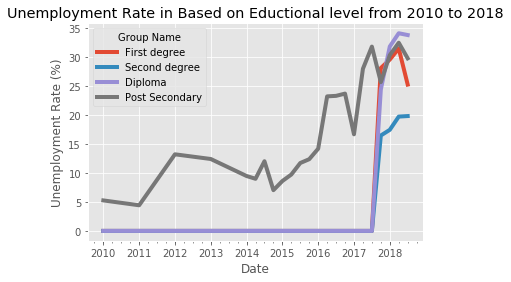

In [616]:
style.use("ggplot")
education_df.plot(linewidth = 4) #data visualization using line plot
plt.grid(True)
plt.title('Unemployment Rate in Based on Eductional level from 2010 to 2018')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Analyzing Underemployment Rate  

In [617]:
under_employment_rate_df = pd.read_csv('under_employment_rate.csv') #Load CSV file into memory
under_employment_rate_df

,country,indicator,group,Unit,Date,Value
0,Nigeria,Under Employement Rate,Male,%,2014Q1,14.674677
1,Nigeria,Under Employement Rate,Male,%,2014Q2,14.854312
2,Nigeria,Under Employement Rate,Male,%,2014Q3,12.929161
3,Nigeria,Under Employement Rate,Male,%,2014Q4,14.981634
4,Nigeria,Under Employement Rate,Male,%,2015Q1,13.917293
5,Nigeria,Under Employement Rate,Male,%,2015Q2,15.350115
6,Nigeria,Under Employement Rate,Male,%,2015Q3,14.581238
7,Nigeria,Under Employement Rate,Male,%,2015Q4,15.680988
8,Nigeria,Under Employement Rate,Male,%,2016Q1,16.222466
9,Nigeria,Under Employement Rate,Male,%,2016Q2,16.399041


In [618]:
under_employment_rate_df = under_employment_rate_df[['group','Date','Value']] #Selecting the columns needed for the analysis
under_employment_rate_df.head()

,group,Date,Value
0,Male,2014Q1,14.674677
1,Male,2014Q2,14.854312
2,Male,2014Q3,12.929161
3,Male,2014Q4,14.981634
4,Male,2015Q1,13.917293


In [619]:
under_employment_rate_df_pivot= under_employment_rate_df.pivot_table(index ='Date',columns = 'group', values = 'Value') #pivot table
under_employment_rate_df_pivot

group,Female,Male
Date,,
2010,18.059422,15.014258
2011,18.256559,17.633149
2012,17.916533,15.650383
2013,17.401380,12.383819
2014Q1,20.620427,14.674677
2014Q2,20.872844,14.854312
2014Q3,18.167678,12.929161
2014Q4,21.051753,14.981634
2015Q1,19.556173,13.917293


In [620]:
under_employment_rate_df1 = under_employment_rate_df_pivot.groupby('Date')  #grouping data
under_employment_rate_df1.count()

group,Female,Male
Date,,
2010,1,1
2011,1,1
2012,1,1
2013,1,1
2014Q1,1,1
2014Q2,1,1
2014Q3,1,1
2014Q4,1,1
2015Q1,1,1


In [621]:
under_employment_rate_df1 = under_employment_rate_df1.agg(np.mean)

In [622]:
under_employment_rate_df1.head()

group,Female,Male
Date,,
2010,18.059422,15.014258
2011,18.256559,17.633149
2012,17.916533,15.650383
2013,17.401380,12.383819
2014Q1,20.620427,14.674677


# Data visualization with bar plot

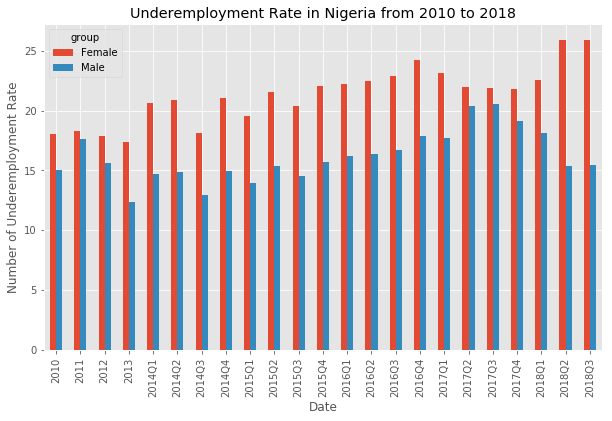

In [623]:
style.use("ggplot")
under_employment_rate_df1.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Date')
plt.ylabel('Number of Underemployment Rate')
plt.title('Underemployment Rate in Nigeria from 2010 to 2018') 
plt.show()

# Analyzing other countries unemployment rate

In [624]:
world_unemployment_rate_df = pd.read_csv('world_unemployment_rate.csv')
world_unemployment_rate_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.470000,2.275000,1.984000,1.692000,1.725000,1.735000,1.679000,1.634000,1.559000,1.542000
2,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.609000,9.089000,7.362000,7.359000,7.454000,7.429000,7.279000,7.281000,7.139000,7.253000
3,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.674000,14.086000,13.481000,13.376000,15.866000,17.490000,17.080000,15.220000,13.750000,13.898000
4,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.280123,9.198516,10.066437,10.263793,10.249142,10.247615,10.248295,9.990830,9.975419,9.960055
6,United Arab Emirates,ARE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.699000,2.663000,2.494000,2.409000,2.292000,2.061000,1.836000,1.636000,2.463000,2.575000
7,Argentina,ARG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.645000,7.714000,7.179000,7.217000,7.100000,7.268000,7.643000,8.016000,8.347000,9.483000
8,Armenia,ARM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.740000,19.007999,18.443001,17.309999,16.179001,17.497999,18.261000,17.617001,17.827000,17.712000
9,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tidying up data

In [625]:
world_unemployment_rate_df = world_unemployment_rate_df[['Country Name','2010','2011','2012','2013','2014','2015','2016','2017','2018']]

In [626]:
world_unemployment_rate_df = pd.melt(world_unemployment_rate_df, id_vars = ['Country Name'], var_name='Year')

In [627]:
world_unemployment_rate_df = world_unemployment_rate_df.dropna(how = 'any') #droping missing data
world_unemployment_rate_df.isnull() #checking for missing data

,Country Name,Year,value
1,False,False,False
2,False,False,False
3,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
11,False,False,False
12,False,False,False
13,False,False,False


In [628]:
world_unemployment_rate_df['Year'] = pd.to_datetime(world_unemployment_rate_df.Year).dt.year

In [629]:
world_unemployment_rate_df.set_index('Country Name', inplace = True)
world_unemployment_rate_df

,Year,value
Country Name,,
Afghanistan,2010,2.275000
Angola,2010,9.089000
Albania,2010,14.086000
Arab World,2010,9.198516
United Arab Emirates,2010,2.663000
Argentina,2010,7.714000
Armenia,2010,19.007999
Australia,2010,5.211000
Austria,2010,4.820000


In [652]:
world_unemployment_rate_df1 = world_unemployment_rate_df.loc[['China','India','United States','Nigeria']] #selecting rows needed for analysis from the dataframe
world_unemployment_rate_df1.reset_index(inplace = True)
world_unemployment_rate_df1

,Country Name,Year,value
0,China,2010,4.500
1,China,2011,4.500
2,China,2012,4.600
3,China,2013,4.600
4,China,2014,4.600
5,China,2015,4.600
6,China,2016,4.500
7,China,2017,4.400
8,China,2018,4.417
9,India,2010,2.444


In [653]:
world_unemployment_rate_pivoted = world_unemployment_rate_df1.pivot_table(index = 'Year',columns = 'Country Name', values = 'value')
world_unemployment_rate_pivoted

Country Name,China,India,Nigeria,United States
Year,,,,
2010,4.500,2.444,3.770,9.633
2011,4.500,2.519,3.697,8.949
2012,4.600,2.690,3.693,8.069
2013,4.600,2.823,3.703,7.375
2014,4.600,2.765,4.437,6.168
2015,4.600,2.782,5.313,5.280
2016,4.500,2.730,6.237,4.869
2017,4.400,2.557,6.013,4.355
2018,4.417,2.551,6.026,3.933


In [654]:
world_unemployment_rate_grouped = world_unemployment_rate_pivoted.groupby('Year')
world_unemployment_rate_grouped.count()

Country Name,China,India,Nigeria,United States
Year,,,,
2010,1,1,1,1
2011,1,1,1,1
2012,1,1,1,1
2013,1,1,1,1
2014,1,1,1,1
2015,1,1,1,1
2016,1,1,1,1
2017,1,1,1,1
2018,1,1,1,1


In [655]:
world_unemployment_rate_df2 = world_unemployment_rate_grouped.agg(np.mean)
world_unemployment_rate_df2

Country Name,China,India,Nigeria,United States
Year,,,,
2010,4.500,2.444,3.770,9.633
2011,4.500,2.519,3.697,8.949
2012,4.600,2.690,3.693,8.069
2013,4.600,2.823,3.703,7.375
2014,4.600,2.765,4.437,6.168
2015,4.600,2.782,5.313,5.280
2016,4.500,2.730,6.237,4.869
2017,4.400,2.557,6.013,4.355
2018,4.417,2.551,6.026,3.933


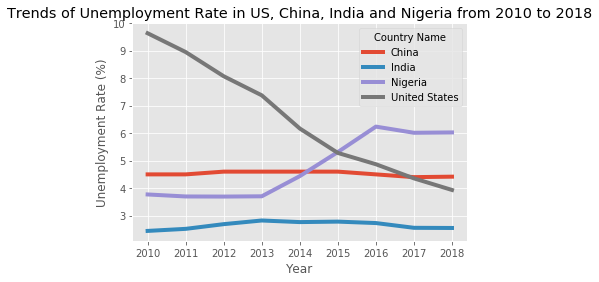

In [657]:
style.use("ggplot")
world_unemployment_rate_df2.plot(linewidth = 4) #data visualization using line plot
plt.grid(True)
plt.title('Trends of Unemployment Rate in US, China, India and Nigeria from 2010 to 2018')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [635]:
world_labour_force_df = pd.read_csv('labour_force.csv')
world_labour_force_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,9244457.0,9516457.0,9940084.0,10446498.0,11014922.0,11611982.0,12213764.0,12759869.0,13285878.0,13760401.0
2,Angola,AGO,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,9234343.0,9580585.0,9926136.0,10291685.0,10673187.0,11068850.0,11477177.0,11891201.0,12315755.0,12759956.0
3,Albania,ALB,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1226713.0,1225744.0,1271832.0,1325041.0,1249102.0,1275842.0,1333035.0,1332087.0,1333543.0,1336470.0
4,Andorra,AND,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [636]:
world_labour_force_df = world_labour_force_df[['Country Name','2010','2011','2012','2013','2014','2015','2016','2017','2018']]
world_labour_force_df

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,9.516457e+06,9.940084e+06,1.044650e+07,1.101492e+07,1.161198e+07,1.221376e+07,1.275987e+07,1.328588e+07,1.376040e+07
2,Angola,9.580585e+06,9.926136e+06,1.029168e+07,1.067319e+07,1.106885e+07,1.147718e+07,1.189120e+07,1.231576e+07,1.275996e+07
3,Albania,1.225744e+06,1.271832e+06,1.325041e+06,1.249102e+06,1.275842e+06,1.333035e+06,1.332087e+06,1.333543e+06,1.336470e+06
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,1.144619e+08,1.177285e+08,1.210025e+08,1.244523e+08,1.267220e+08,1.286635e+08,1.310502e+08,1.338093e+08,1.367628e+08
6,United Arab Emirates,5.980833e+06,6.265640e+06,6.429129e+06,6.508466e+06,6.564190e+06,6.640374e+06,6.676773e+06,6.745970e+06,6.820923e+06
7,Argentina,1.852103e+07,1.883007e+07,1.901597e+07,1.915157e+07,1.920736e+07,1.953567e+07,1.984834e+07,2.016393e+07,2.036020e+07
8,Armenia,1.379805e+06,1.403774e+06,1.400881e+06,1.414015e+06,1.411628e+06,1.397970e+06,1.374185e+06,1.374665e+06,1.379542e+06
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [637]:
world_labour_force_df = pd.melt(world_labour_force_df, id_vars = ["Country Name"], var_name='Year')
world_labour_force_df.set_index('Country Name', inplace = True)
world_labour_force_df.head()

,Year,value
Country Name,,
Aruba,2010,NaN
Afghanistan,2010,9516457.0
Angola,2010,9580585.0
Albania,2010,1225744.0
Andorra,2010,NaN


In [638]:
world_labour_force_df['Year'] = pd.to_datetime(world_labour_force_df.Year).dt.year

In [658]:
world_labour_force_df = world_labour_force_df.loc[['China','India','United States','Nigeria']] #selecting rows needed for analysis
world_labour_force_df

,Year,value
Country Name,,
China,2010,779956733.0
China,2011,783018630.0
China,2012,785504321.0
China,2013,787010207.0
China,2014,788179264.0
China,2015,788901659.0
China,2016,789149173.0
China,2017,789899683.0
China,2018,787551371.0


In [659]:
merged_data = world_labour_force_df.merge(world_unemployment_rate_df1, on = ['Year','Country Name'])
merged_data

,Year,Country Name,value_x,value_y
0,2010,China,779956733.0,4.500
1,2011,China,783018630.0,4.500
2,2012,China,785504321.0,4.600
3,2013,China,787010207.0,4.600
4,2014,China,788179264.0,4.600
5,2015,China,788901659.0,4.600
6,2016,China,789149173.0,4.500
7,2017,China,789899683.0,4.400
8,2018,China,787551371.0,4.417
9,2010,India,460155571.0,2.444


In [660]:
merged_data = merged_data.rename(columns={'value_x': 'Labour_force','value_y':'No_of_unemployment'})

In [661]:
merged_data_pivoted = merged_data.pivot_table(index = 'Year',columns = 'Country Name', values = ['No_of_unemployment','Labour_force'])
merged_data_pivoted

Labour_force                                         \
Country Name        China        India     Nigeria United States   
Year                                                               
2010          779956733.0  460155571.0  48780928.0   157013742.0   
2011          783018630.0  460826742.0  50069086.0   157106313.0   
2012          785504321.0  461674180.0  51416082.0   158371469.0   
2013          787010207.0  470509991.0  52824355.0   158920776.0   
2014          788179264.0  479196557.0  54264637.0   159684414.0   
2015          788901659.0  487575264.0  55820029.0   160697721.0   
2016          789149173.0  495707548.0  57398211.0   162618901.0   
2017          789899683.0  503366275.0  59039086.0   164236550.0   
2018          787551371.0  510486051.0  60724398.0   164867943.0   

             No_of_unemployment                               
Country Name              China  India Nigeria United States  
Year                                                          
2010                      4.500  2.444   3.770         9.633  
2011                      4.500  2.519   3.697         8.949  
2012                      4.600  2.690   3.693         8.069  
2013                      4.600  2.823   3.703         7.375  
2014                      4.600  2.765   4.437         6.168  
2015                      4.600  2.782   5.313         5.280  
2016                      4.500  2.730   6.237         4.869  
2017                      4.400  2.557   6.013         4.355  
2018                      4.417  2.551   6.026         3.933

In [662]:
merged_data_pivoted['Labour_force']

Country Name,China,India,Nigeria,United States
Year,,,,
2010,779956733.0,460155571.0,48780928.0,157013742.0
2011,783018630.0,460826742.0,50069086.0,157106313.0
2012,785504321.0,461674180.0,51416082.0,158371469.0
2013,787010207.0,470509991.0,52824355.0,158920776.0
2014,788179264.0,479196557.0,54264637.0,159684414.0
2015,788901659.0,487575264.0,55820029.0,160697721.0
2016,789149173.0,495707548.0,57398211.0,162618901.0
2017,789899683.0,503366275.0,59039086.0,164236550.0
2018,787551371.0,510486051.0,60724398.0,164867943.0


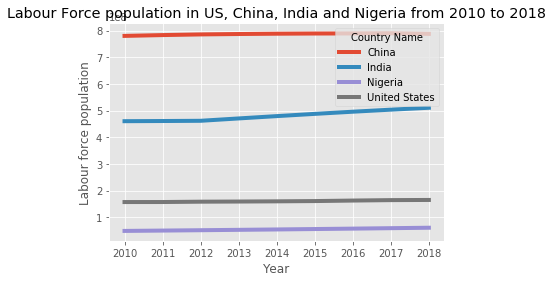

In [663]:
merged_data_pivoted['Labour_force'].plot(linewidth = 4) #data visualization using line plot 
plt.xlabel('Year')
plt.ylabel('Labour force population')
plt.title('Labour Force population in US, China, India and Nigeria from 2010 to 2018') 
plt.grid(True)
plt.show()
style.use("ggplot")


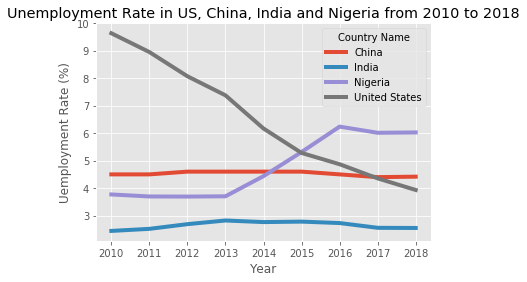

In [665]:
merged_data_pivoted['No_of_unemployment'].plot(linewidth = 4) 
plt.xlabel('Year')
plt.ylabel('Uemployment Rate (%)')
plt.title('Unemployment Rate in US, China, India and Nigeria from 2010 to 2018') 
plt.show()